In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [3]:
dir_path = '/home/shiva/Datasets/V2_01_easy/V2_01_easy/'

In [4]:
!ls $dir_path

home_office_3_400p	 mav0_office_NEW-working
home_office_4_720p	 mav0_office_working5
home_office_working_2	 mav0_virtana_office_working_2
ImuParams.yaml		 mav0_virtana_office_working_3
Kimera_VIO_Output	 PARAMS_Custom
LeftCameraParams.yaml	 PARAMS_Euroc
mav0			 RightCameraParams.yaml
mav0_euroc		 Timestamp_Checks_Manipulation.ipynb
mav0_office_new_working  virtana_office_working_1


In [5]:
dir_name = 'mav0'

In [7]:
num_rows_to_skip = 0

In [8]:
imu_df = pd.read_csv(f'{dir_path}{dir_name}/imu0/data.csv',skiprows=[1, num_rows_to_skip+1])
cam_df = pd.read_csv(f'{dir_path}{dir_name}/cam0/data.csv',skiprows=[1, num_rows_to_skip+1])

In [9]:
cam_df

,#timestamp [ns],filename
0,1413393212355760384,1413393212355760384.png
1,1413393212455760384,1413393212455760384.png
2,1413393212555760384,1413393212555760384.png
3,1413393212655760384,1413393212655760384.png
4,1413393212755760384,1413393212755760384.png
...,...,...
1134,1413393325755760384,1413393325755760384.png
1135,1413393325855760384,1413393325855760384.png
1136,1413393325955760384,1413393325955760384.png
1137,1413393326055760384,1413393326055760384.png


In [10]:
nearest_imu_ts = []

for cam_ts in cam_df['#timestamp [ns]']:
    nearest_imu_ts.append(find_nearest(imu_df['#timestamp [ns]'].values, cam_ts))

In [11]:
len(nearest_imu_ts)

1139

In [12]:
delta_df = pd.DataFrame({'nearest_imu_ts':nearest_imu_ts, '#timestamp [ns]':cam_df['#timestamp [ns]']})

In [13]:
delta_df['imu_cam_delta'] = np.abs(delta_df['#timestamp [ns]'] - delta_df['nearest_imu_ts'])/1000000

In [14]:
delta_df.head(5)

,nearest_imu_ts,#timestamp [ns],imu_cam_delta
0,1413393212475760384,1413393212355760384,120.0
1,1413393212475760384,1413393212455760384,20.0
2,1413393212555760384,1413393212555760384,0.0
3,1413393212655760384,1413393212655760384,0.0
4,1413393212755760384,1413393212755760384,0.0


In [15]:
delta_df['imu_cam_delta'].describe()

count    1139.000000
mean        0.122915
std         3.604185
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       120.000000
Name: imu_cam_delta, dtype: float64

<Axes: xlabel='#timestamp [ns]', ylabel='imu_cam_delta'>

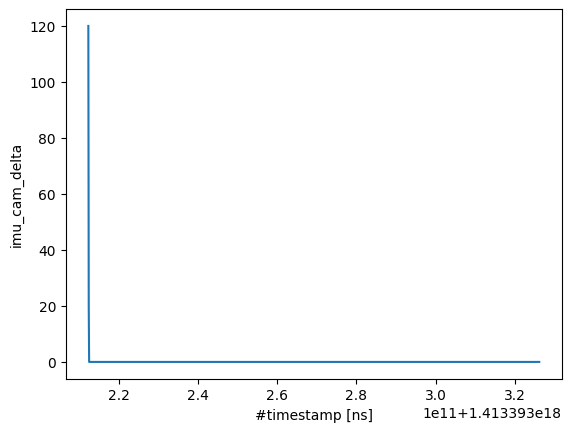

In [16]:
sns.lineplot(data=delta_df, x='#timestamp [ns]', y='imu_cam_delta')